<a href="https://colab.research.google.com/github/havigowda9625/AIML-DS-/blob/main/Bert_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers torch seaborn matplotlib

Tokens: ['[CLS]', 'i', 'like', 'data', 'science', 'and', 'machine', 'learning', '[SEP]']

Final Layer Attention (avg over heads):

     [CLS] → [SEP]      : 0.263
         i → [SEP]      : 0.710
      like → [SEP]      : 0.648
      data → [SEP]      : 0.603
   science → [SEP]      : 0.640
       and → [SEP]      : 0.598
   machine → [SEP]      : 0.637
  learning → [SEP]      : 0.596
     [SEP] → [SEP]      : 0.929


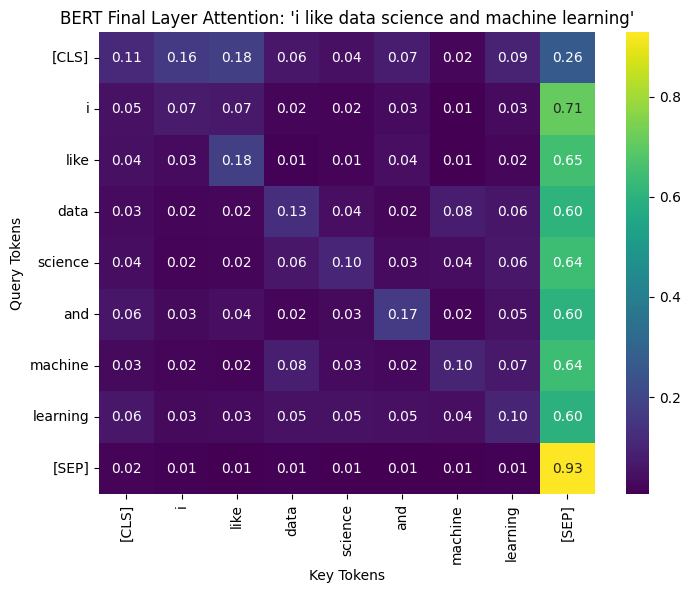

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)
model.eval()

sentence = "i like data science and machine learning"

inputs = tokenizer(sentence, return_tensors="pt")
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

print("Tokens:", tokens)
with torch.no_grad():
    outputs = model(**inputs)
final_layer_attention = outputs.attentions[-1]
avg_attention = final_layer_attention.mean(dim=1)[0]
print("\nFinal Layer Attention (avg over heads):\n")

for i, q_token in enumerate(tokens):
    for j, k_token in enumerate(tokens):
        weight = avg_attention[i, j].item()
        if weight > 0.20:
            print(f"{q_token:>10} → {k_token:<10} : {weight:.3f}")

plt.figure(figsize=(8, 6))
sns.heatmap(
    avg_attention.numpy(),
    xticklabels=tokens,
    yticklabels=tokens,
    annot=True,
    fmt=".2f",
    cmap="viridis"
)

plt.title("BERT Final Layer Attention: 'i like data science and machine learning'")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame(
    avg_attention.numpy(),
    index=tokens,
    columns=tokens
)

pd.set_option("display.precision", 3)
df

,[CLS],i,like,data,science,and,machine,learning,[SEP]
[CLS],0.107,0.161,0.175,0.060,0.042,0.074,0.023,0.094,0.263
i,0.045,0.074,0.066,0.018,0.016,0.031,0.009,0.031,0.710
like,0.043,0.034,0.178,0.012,0.015,0.040,0.008,0.022,0.648
data,0.032,0.018,0.023,0.128,0.040,0.022,0.076,0.057,0.603
science,0.036,0.016,0.017,0.062,0.100,0.032,0.035,0.062,0.640
and,0.056,0.028,0.039,0.020,0.030,0.165,0.016,0.048,0.598
machine,0.029,0.017,0.015,0.082,0.032,0.025,0.097,0.067,0.637
learning,0.063,0.031,0.034,0.049,0.045,0.045,0.041,0.096,0.596
[SEP],0.015,0.009,0.008,0.010,0.005,0.006,0.007,0.010,0.929


In [ ]:
import numpy as np

In [ ]:
data = "i like data science and machine learning"

In [ ]:
num_words = len(data.split())

In [ ]:
np.random.seed(42)

In [ ]:
embeddings = np.random.randint(0, 10, (num_words, embedding_dim)) / 10
print("Embeddings shape:", embeddings.shape)
embedding_dim = 10

Embeddings shape: (7, 10)


In [ ]:
d_k = 4
wq = np.random.randint(0, 10, (embedding_dim, d_k)) / 10
wk = np.random.randint(0, 10, (embedding_dim, d_k)) / 10
wv = np.random.randint(0, 10, (embedding_dim, d_k)) / 10

In [ ]:
Q = np.dot(embeddings, wq)
K = np.dot(embeddings, wk)
V = np.dot(embeddings, wv)

print("Q shape:", Q.shape)
print("K shape:", K.shape)
print("V shape:", V.shape)

Q shape: (7, 4)
K shape: (7, 4)
V shape: (7, 4)


In [ ]:
scores = np.dot(Q, K.T)
scaled_scores = scores / np.sqrt(d_k)

In [ ]:
def softmax(x):
  e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return e_x / e_x.sum(axis=1, keepdims=True)
attention_weights = softmax(scaled_scores)

In [ ]:
final_attention_matrix = np.dot(attention_weights, V)
print("\nFinal Attention Matrix shape:", final_attention_matrix.shape)
print("\nFinal Attention Matrix:\n", final_attention_matrix)


Final Attention Matrix shape: (7, 4)

Final Attention Matrix:
 [[2.63728873 2.09662155 1.98945844 1.66598209]
 [2.60539192 2.06016434 1.95541567 1.6368124 ]
 [2.61724187 2.06750964 1.96529993 1.64601006]
 [2.60405248 2.06037555 1.95496363 1.63600155]
 [2.63361592 2.09032895 1.98600429 1.66296127]
 [2.53767911 1.98574845 1.88991936 1.5813362 ]
 [2.641515   2.10337015 1.99508918 1.67034992]]
